In [27]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
%matplotlib inline 

In [28]:
#sigma beta and rho values that lorenz used!
def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt , dy_dt, dz_dt]

In [29]:
####PARAMETERS

N_trajectories = 3

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3)) #20 diff starts points with x,y,z

########## Solve for the trajectories

t = np.linspace(0, 4, 1000) #create 1000 points from 0 to 4
#caculate the lorentz deriv then integrate for each of the 20 points across the time array t
x_t = np.asarray([integrate.odeint(lorentz_deriv, xi, t) for xi in x0]) 


In [30]:
# Plot the background for each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts



In [31]:
# animation function is called sequentially with the frame number
def animate(i):
    # steping two time-steps per frame
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])
 ##Allows it to rotate
    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

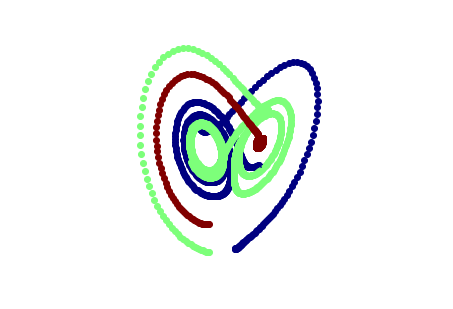

In [32]:
# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], "o", c=c) for c in colors], [])
pts = sum([ax.plot([], [], [], '*', c=c) for c in colors], [])

# set the x,y,z limits 
ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))
ax.set_zlim((0, 50))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(45, 180)

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('lorentz_attractor2.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()